# **Exploratory Data Analysis - Covid 19 Indonesia Dataset (2020 Period)**

*Tuesday, 3 May 2022*

***Created by Ahmad Nafiys Ismail***

# Deskripsi Data

Dataset ini berisi 893 informasi pasien dengan 11 variabel berbeda sampai dengan tanggal 31 maret 2020
* patient_id = ID pasien
* gender = jenis kelamin pasien
* age = usia pasien
* nationality = kewarganegaraan pasien
* province = wilayah / provinsi pasien
* current_state = kota pasien
* contacted_with = dihubungi / terinfeksi oleh nomor id pasien
* confirm_date = tanggal konfirmasi
* release_date = tanggal keluarnya
* deceased_date = tanggal kematian
* hospital = lokasi rawat inap

**Catatan**: Struktur kumpulan data, grafik, dan observasi dapat bervariasi di suatu tempat karena dataset ini terus diperbarui. Jadi, pengamatan tekstual statis mungkin sedikit berbeda dari representasi grafis. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pasien = pd.read_csv('../input/indonesia-coronavirus-cases/patient.csv')
cases = pd.read_csv('../input/indonesia-coronavirus-cases/cases.csv')

In [ ]:
pasien.head()

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan


In [ ]:
pasien.describe()

,patient_id,age,contacted_with
count,893.000000,156.000000,27.000000
mean,447.000000,48.108974,30.555556
std,257.931192,16.627833,36.051601
min,1.000000,2.000000,1.000000
25%,224.000000,36.000000,1.000000
50%,447.000000,49.000000,1.000000
75%,670.000000,59.000000,74.000000
max,893.000000,86.000000,83.000000


In [ ]:
pasien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 11 columns):
patient_id        893 non-null int64
gender            156 non-null object
age               156 non-null float64
nationality       156 non-null object
province          156 non-null object
current_state     166 non-null object
contacted_with    27 non-null float64
confirmed_date    893 non-null object
released_date     5 non-null object
deceased_date     4 non-null object
hospital          17 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 76.9+ KB


In [ ]:
pasien['current_state'].value_counts()

isolated    143
deceased     15
released      8
Name: current_state, dtype: int64

Dari 893 pasien terinveksi covid-19, 8 pasien sudah sembuh, 15 pasien meninggal, sedangkan 143 pasien sudah diisolasi. 

In [ ]:
male = pasien.loc[pasien['gender']=='male','age'].mean()
female = pasien.loc[pasien['gender']=='female','age'].mean()
print('Distribusi rata-rata umur pasien laki-laki: %i' %male, 'tahun')
print('Distribusi rata-rata umur pasien perempuan: %i' %female, 'tahun')

Distribusi rata-rata umur pasien laki-laki: 48 tahun
Distribusi rata-rata umur pasien perempuan: 47 tahun


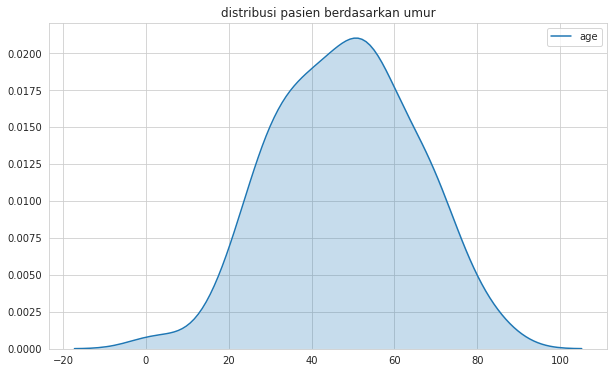

In [ ]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.title("distribusi pasien berdasarkan umur")
sns.kdeplot(data=pasien['age'], shade=True)

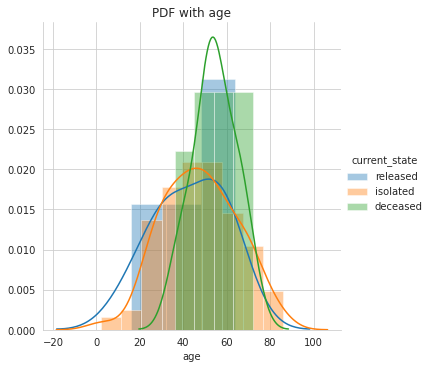

In [ ]:
sns.FacetGrid(pasien, hue="current_state", size=5) \
 .map(sns.distplot, "age") \
 .add_legend()
plt.title('PDF with age')
plt.show()

**Interpretasi:**
1. Distribusi pasien yang meninggal berada diusia 50 - 70 tahun
2. Distribusi pasien yang sembuh berada diusia 20 - 60 tahun 

## Countplot

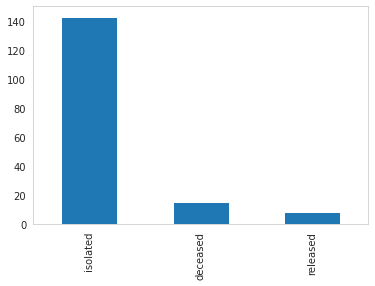

In [ ]:
pasien.current_state.value_counts().plot.bar().grid()

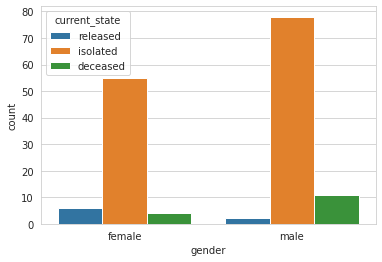

In [ ]:
sns.countplot(x='gender', hue='current_state', data=pasien)

**Interpretasi:**

Sebagian besar yang terkena covid-19 berjenis kelamin laki-laki

# Barplot

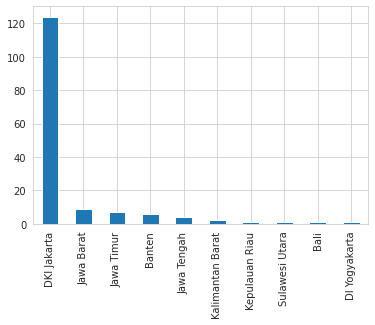

In [ ]:
pasien.province.value_counts().plot.bar()

**Interpretasi:**

Sebagian besar orang yang terinfeksi covid-19 berada di DKI Jakarta

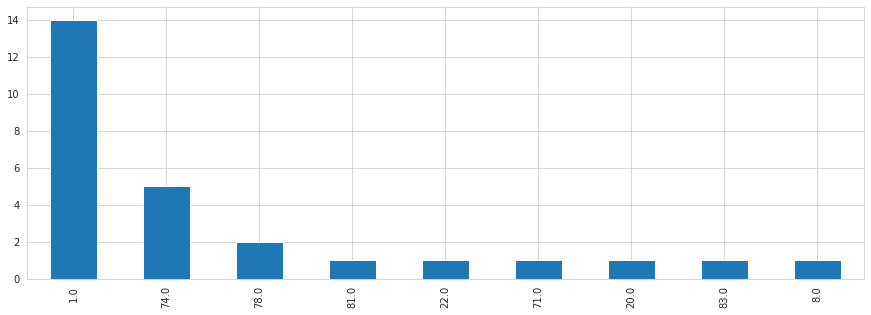

In [ ]:
plt.figure(figsize=(15,5))
pasien.contacted_with.value_counts().plot.bar()

**Interpretasi:**

Sebagian besar pasien terinfeksi oleh pasien dengan ID 1.0

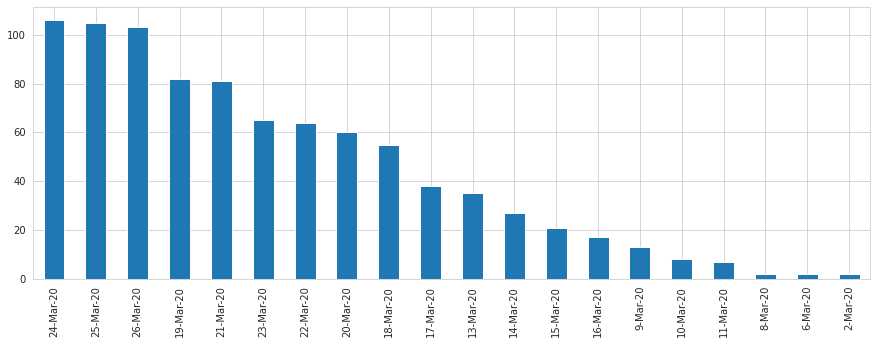

In [ ]:
plt.figure(figsize=(15,5))
pasien.confirmed_date.value_counts().plot.bar()

**Interpretasi:**

Jumlah kasus postif covid-19 per hari terbanyak terdapat di tanggal 24-Mar-2020 (106 kasus)

# Scatter Plot

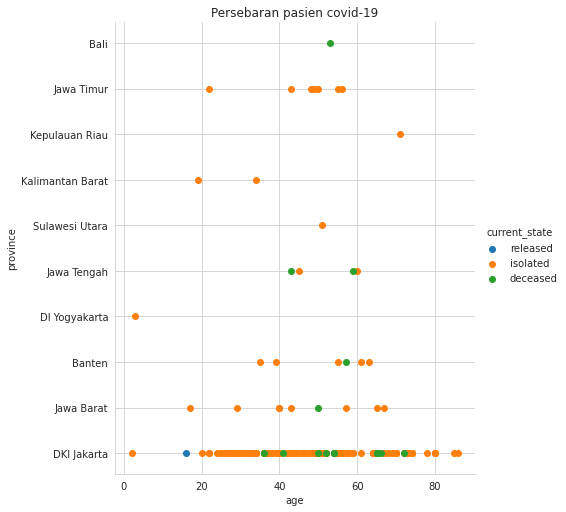

In [ ]:
sns.FacetGrid(pasien, hue = 'current_state', size = 7)\
.map(plt.scatter, 'age', 'province')\
.add_legend()
plt.title('Persebaran pasien covid-19')
plt.show()

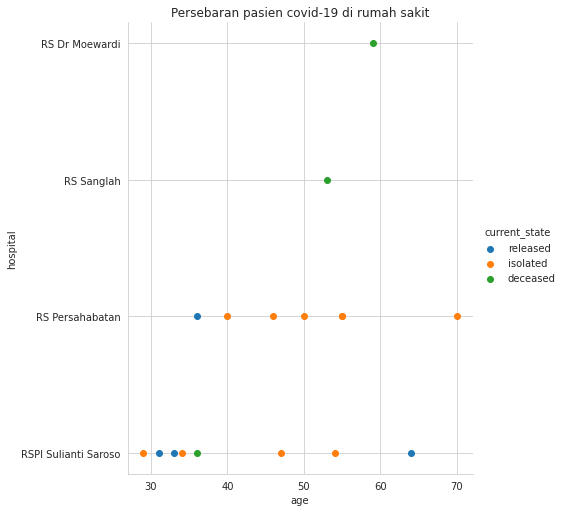

In [ ]:
sns.FacetGrid(pasien, hue = 'current_state', size = 7)\
.map(plt.scatter, 'age', 'hospital')\
.add_legend()
plt.title('Persebaran pasien covid-19 di rumah sakit')
plt.show()

# **Reference**


1.   https://www.kaggle.com/code/yazidivan1/exploratory-data-analysis-covid-19-indonesia
2.   https://ieeexplore.ieee.org/document/9358331
